In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import keras
%matplotlib inline 

In [5]:
dataset = pd.read_csv (r"C:\Users\user\Desktop\SelectedProject\numerical\diabetes.csv")

In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.isnull().values.any() #check null ..

False

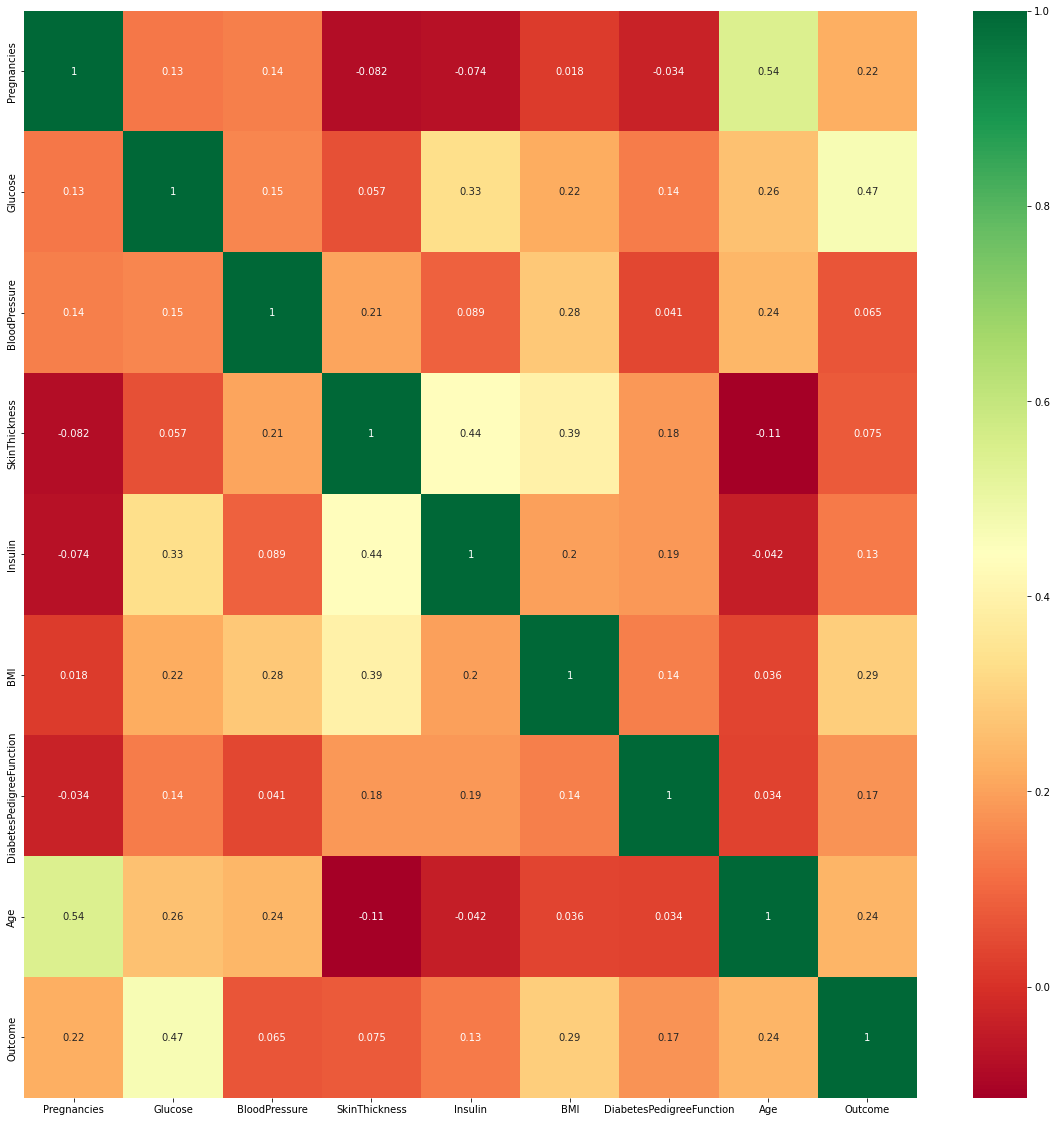

In [9]:
import seaborn as sns 
corrmat = dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(), annot=True,cmap='RdYlGn')

In [10]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#split
X = pd.DataFrame(dataset.iloc[:,: 8].values)
y = dataset.iloc[:, 8].values

In [12]:
y.shape

(768,)

In [13]:
>>> from sklearn.model_selection import StratifiedKFold
>>> skf = StratifiedKFold(n_splits=10)
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
>>> for train_index, test_index in skf.split(X, y):
#...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
...     y_train, y_test = y[train_index], y[test_index]

In [14]:
X_test.shape

(76, 8)

In [15]:
#scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_test


array([[-0.25038996,  0.29039639, -0.25658408, -1.28250892, -0.69196922,
        -1.10974495, -0.47775289, -0.95105601],
       [-0.84377986, -0.42122007, -0.97710193, -0.09593322, -0.69196922,
        -0.45506165, -0.87218113, -0.35890751],
       [-0.84377986,  0.59979484,  0.25807152,  0.34122625,  0.86142598,
        -0.98384432,  1.04657878, -0.86646337],
       [ 1.2330848 , -0.42122007,  0.56686489, -1.28250892, -0.69196922,
        -0.920894  ,  1.12961631,  0.0640557 ],
       [-0.54708491,  0.01193777,  0.05220928,  0.71593437,  0.12787825,
         0.90466519,  1.21858508, -0.86646337],
       [-0.54708491, -0.94719745, -0.46244632, -1.28250892, -0.69196922,
        -1.0593847 , -0.84252487, -0.69727808],
       [-1.14047482, -0.66873884, -3.55037995, -1.28250892, -0.69196922,
        -0.87053375, -0.65865607, -0.95105601],
       [ 0.04630499,  0.19757685,  0.97858937, -0.59554404,  0.64567664,
         0.32552227,  0.36448484, -0.44350016],
       [ 0.04630499, -0.08088176

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras import regularizers

In [18]:
classifier = Sequential()
classifier.add(Dense(8,  activation = 'tanh', input_dim = 8, kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dense(4,activation = 'tanh'))
classifier.add(Dense(1,activation = 'sigmoid'))
opt = SGD(lr=0.01, momentum=0.9, decay=0.001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
history =  classifier.fit(X_train, y_train, batch_size =10, epochs = 100 , validation_split = 0.3)



C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
49/49 [==============================] - 1s 6ms/step - loss: 0.7692 - accuracy: 0.5599 - val_loss: 0.5956 - val_accuracy: 0.7308
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.7169 - val_loss: 0.5232 - val_accuracy: 0.7500
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7335 - val_loss: 0.4922 - val_accuracy: 0.7692
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7397 - val_loss: 0.4697 - val_accuracy: 0.7837
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7521 - val_loss: 0.4635 - val_accuracy: 0.7885
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7562 - val_loss: 0.4596 - val_accuracy: 0.7885
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7500 - val_loss: 0.4542 - val_accuracy: 0.8029
Epoch 8/100
4

Epoch 59/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7727 - val_loss: 0.4337 - val_accuracy: 0.8029
Epoch 60/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7707 - val_loss: 0.4321 - val_accuracy: 0.7981
Epoch 61/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7665 - val_loss: 0.4362 - val_accuracy: 0.7933
Epoch 62/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7810 - val_loss: 0.4342 - val_accuracy: 0.7981
Epoch 63/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7707 - val_loss: 0.4332 - val_accuracy: 0.7933
Epoch 64/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7748 - val_loss: 0.4309 - val_accuracy: 0.7981
Epoch 65/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7645 - val_loss: 0.4336 - val_accuracy: 0.8077
Epoch 

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[45  5]
 [ 9 17]]


0.8157894736842105

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [22]:
from matplotlib import pyplot

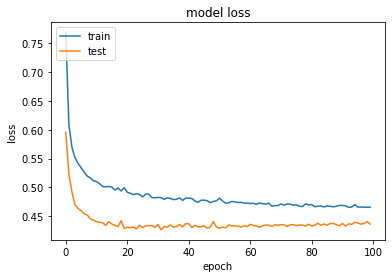

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

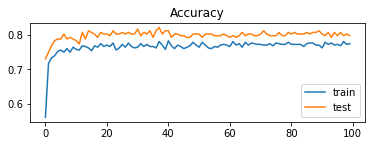

In [24]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [26]:
ns_probs = [0 for _ in range(len(y_test))]

In [27]:
lr_probs = classifier.predict(X_test)

In [28]:
lr_probs = lr_probs[:, 0]

In [29]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [30]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.844


In [31]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

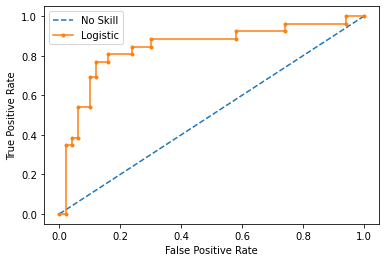

In [32]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()



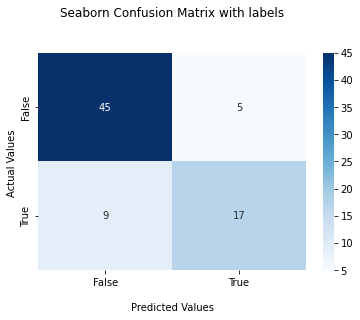

In [34]:
import seaborn as sns

ax = sns.heatmap(cm , annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()